# Logistic Regression

Steps for making this project
1. Import the libraries
2. Import the dataset -(https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv)
3. Perform the Data Analysis(DM, DE, DC, DV, EDA)
4. Feature Scaling
5. Encoding
6. Feature Selection
7. Chossing the model - Logistic Regression
8. Split the data - CV
9. Training the model
10. Test the model
11. performance - Confusion Metric


# importing the libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import re
# label encoder
from sklearn.preprocessing import LabelEncoder
# model
from sklearn.linear_model import LogisticRegression
# To split the data
from sklearn.model_selection import KFold, StratifiedKFold
# Performance Metric - Confusion Matrix
from sklearn.metrics import confusion_matrix
## performance and score
from sklearn.metrics import accuracy_score
# report
from sklearn.metrics import classification_report
# to ignore warning
import warnings
warnings.filterwarnings('ignore')

# importing the dataset

In [271]:
data = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

In [272]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Data Analysis🚀

In [273]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [274]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


columns

In [275]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Explaination of columns : 
* PassengerId: Unique ID for each passenger.
* Survived: Indicates if the passenger survived (1) or not (0).
* Pclass: Passenger's travel class (1st, 2nd, 3rd).
* Name: Passenger's name.
* Sex: Passenger's gender.
* Age: Passenger's age.
* SibSp: Count of siblings/spouses aboard.
* Parch: Count of parents/children aboard.
* Ticket: Ticket number.
* Fare: Ticket cost.
* Cabin: Cabin number (location on the ship).
* Embarked: Port where passenger boarded.

In [276]:
data.shape

(891, 12)

In [277]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [278]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Ploting a graph of all null values are present in the data

<Axes: >

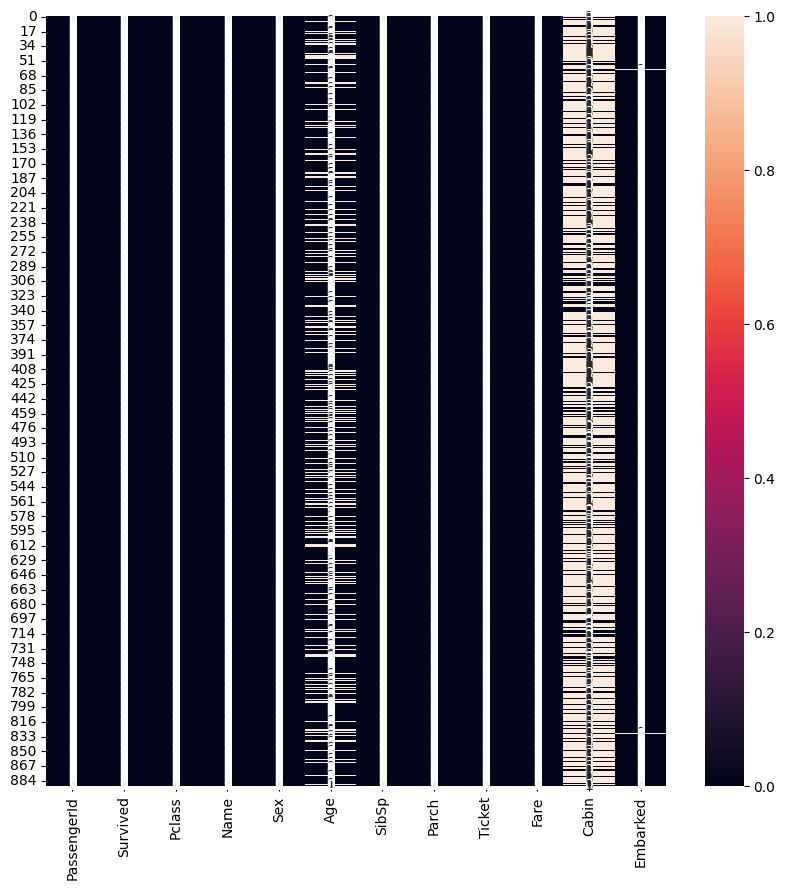

In [279]:
plt.figure(figsize=(10,10))
sns.heatmap(data.isnull(),annot=True)

Age % of null values

In [280]:
(data['Age'].isnull().sum() / len(data['Age']))*100

19.865319865319865

Cabin % of null values

In [281]:
(data['Cabin'].isnull().sum() / len(data['Cabin']))*100

77.10437710437711

In [282]:
data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [283]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Droping the column Cabin from the data because it has more no.of nan values and we can not predict the data from Cabin..... so we can drop it

Droping the Cabin column


In [284]:
data.drop(columns={'Cabin'},inplace=True)

In [285]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [286]:
data['Embarked'].unique()
# S - Southampton,
# Q - Queenstown
# C - Cherbourg

array(['S', 'C', 'Q', nan], dtype=object)

show the datapoints where the Embarked is null

In [287]:
data[data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


# Proof to my NUll hypothesis = no relation
# Altrenate hypothesis = relation

proof my null hypothesis is  wrong

Show all the Embarked values where the Pclass = 1

In [288]:
data.loc[data.Pclass==1,"Embarked"].value_counts()

Embarked
S    127
C     85
Q      2
Name: count, dtype: int64

Show all the Embarked value where the Pclass = 2

In [289]:
data.loc[data.Pclass==2,"Embarked"].value_counts()

Embarked
S    164
C     17
Q      3
Name: count, dtype: int64

Show all the Embarked value where the Pclass = 3

In [290]:
data.loc[data["Pclass"]==3,"Embarked"].value_counts()

Embarked
S    353
Q     72
C     66
Name: count, dtype: int64

In [291]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Show all the Embarked value where the Fare = 80.0

In [292]:
data.loc[data['Fare']==80.0,"Embarked"].value_counts()

Series([], Name: count, dtype: int64)

Show all the Embarked value where the Ticket = 113572

In [293]:
data.loc[data['Ticket']==113572,"Embarked"].value_counts()

Series([], Name: count, dtype: int64)

In [294]:
len(data["Embarked"])

891

In [295]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [296]:
data['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

Mean of the Age column

In [297]:
data['Age'].mean()

29.69911764705882

Median of Age column

In [298]:
data['Age'].median()

28.0

Mode of the Age column

In [299]:
data['Age'].mode()

0    24.0
Name: Age, dtype: float64

Plot a boxpolot to find out the outliers in the Age columns

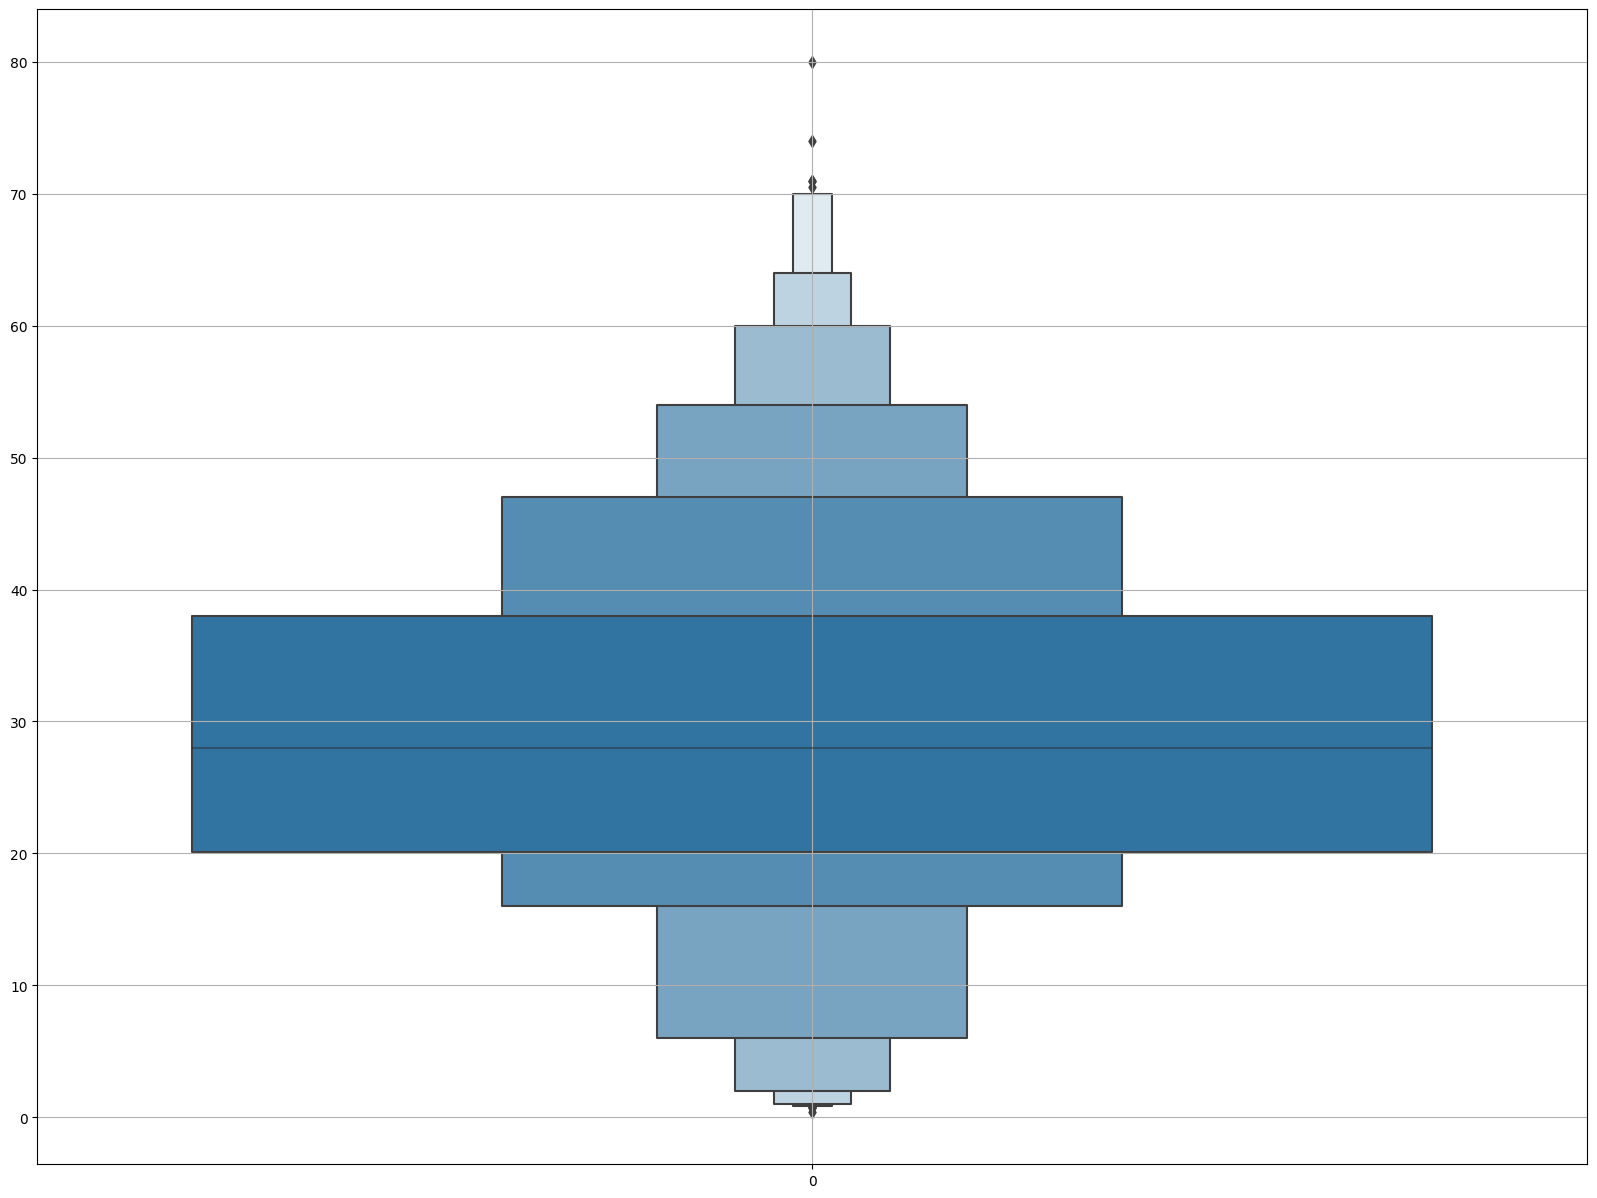

In [300]:
plt.figure(figsize=(20,15))
sns.boxenplot(data['Age'])
plt.grid()

In [301]:
data['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

filling all the null values in the Age column with its Median values

In [302]:
data['Age'].isnull().sum()

177

In [303]:
data['Age'].fillna(data['Age'].median(),inplace=True)

In [304]:
data['Age'].isnull().sum()

0

Drop the rows where Embarked is null

In [305]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [306]:
data.dropna(inplace=True)

In [307]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [308]:
data.shape

(889, 11)

In [309]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Droping the PassengerId , Name, Ticket because these column are no usefull

In [310]:
data.drop(columns={"PassengerId",'Name',"Ticket"},inplace=True)

In [311]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Plot a graph : Strength of Male V/s Strength of Female

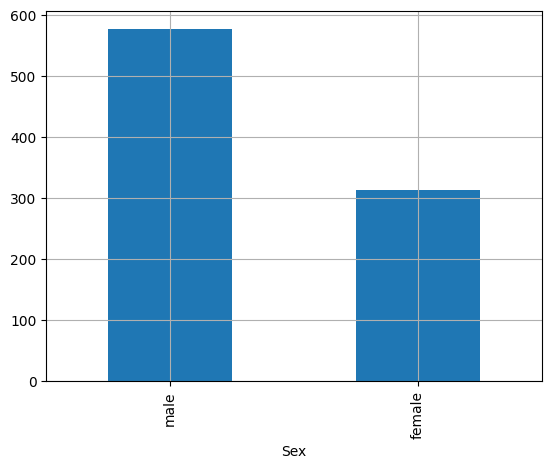

In [312]:
data['Sex'].value_counts().plot.bar()
plt.grid()

Plot a graph : Strength of Survival V/s Strength of Non-survival


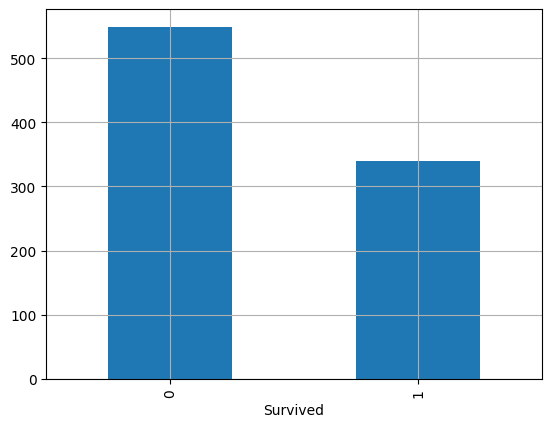

In [313]:
data['Survived'].value_counts().plot.bar()
plt.grid()

Plot a graph to find out the survival & non-survival rate w.r.t. Sex

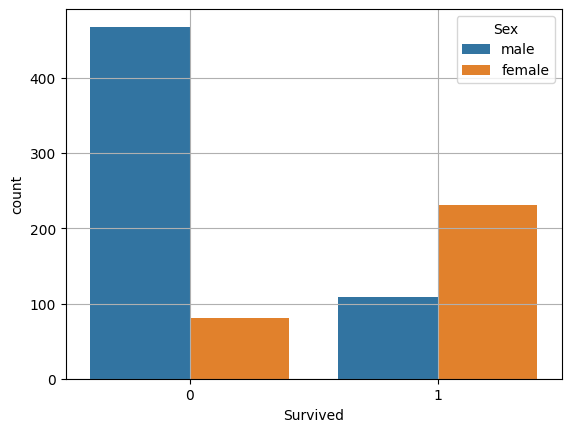

In [314]:
sns.countplot(x="Survived",data=data,hue="Sex")
plt.grid()

Plot a graph to find out the strength of the Pclass

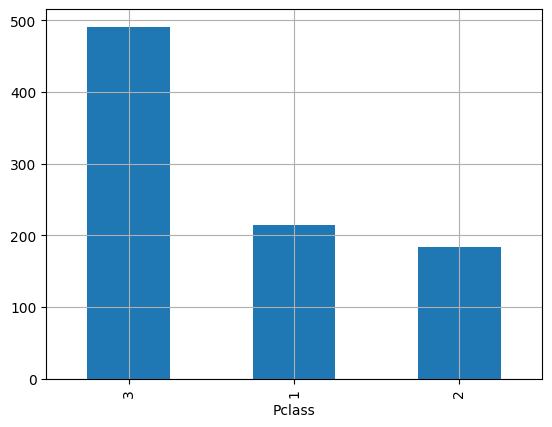

In [315]:
data['Pclass'].value_counts().plot.bar()
plt.grid()

Plot a graph to find out the survival & non-survival rate w.r.t. Pclass

<Axes: xlabel='Survived', ylabel='count'>

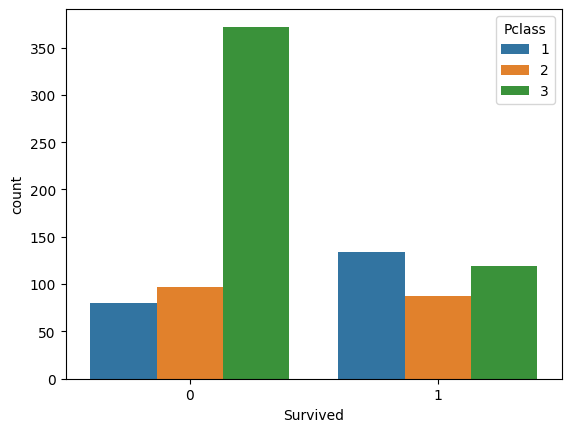

In [316]:
sns.countplot(x="Survived",data=data,hue="Pclass")

In [317]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Changing the dtype of Age

In [318]:
data['Age'] = data['Age'].astype(int)

In [319]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    int32  
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(1), int32(1), int64(4), object(2)
memory usage: 59.0+ KB


# Encoders - To convert the data from the categorical form to numerical form without changing its meaning

import the encoder librarie : from sklearn.preprossing import LabelEncoder

In [324]:
data['Sex'].value_counts()

Sex
male      577
female    312
Name: count, dtype: int64

In [325]:
data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [326]:
data['Sex'] = LabelEncoder().fit_transform(data['Sex'])
data['Embarked'] = LabelEncoder().fit_transform(data['Embarked'])

1 - male, 2 - female

In [327]:
data['Sex'].value_counts()

Sex
1    577
0    312
Name: count, dtype: int64

In [328]:
data['Embarked'].value_counts()

Embarked
2    644
0    168
1     77
Name: count, dtype: int64

In [329]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.2500,2
1,1,1,0,38,1,0,71.2833,0
2,1,3,0,26,0,0,7.9250,2
3,1,1,0,35,1,0,53.1000,2
4,0,3,1,35,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27,0,0,13.0000,2
887,1,1,0,19,0,0,30.0000,2
888,0,3,0,28,1,2,23.4500,2
889,1,1,1,26,0,0,30.0000,0


In [330]:
data.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.335549,-0.541585,-0.069821,-0.034040,0.083151,0.255290,-0.169718
Pclass,-0.335549,1.000000,0.127741,-0.336612,0.081656,0.016824,-0.548193,0.164681
Sex,-0.541585,0.127741,1.000000,0.086091,-0.116348,-0.247508,-0.179958,0.110320
Age,-0.069821,-0.336612,0.086091,1.000000,-0.232312,-0.171749,0.093857,-0.020398
SibSp,-0.034040,0.081656,-0.116348,-0.232312,1.000000,0.414542,0.160887,0.068900
Parch,0.083151,0.016824,-0.247508,-0.171749,0.414542,1.000000,0.217532,0.040449
Fare,0.255290,-0.548193,-0.179958,0.093857,0.160887,0.217532,1.000000,-0.226311
Embarked,-0.169718,0.164681,0.110320,-0.020398,0.068900,0.040449,-0.226311,1.000000


As you see the above correlation is not readble or understandable...plot a headmap  

Text(0.5, 1.0, 'Heatmap of the correlation')

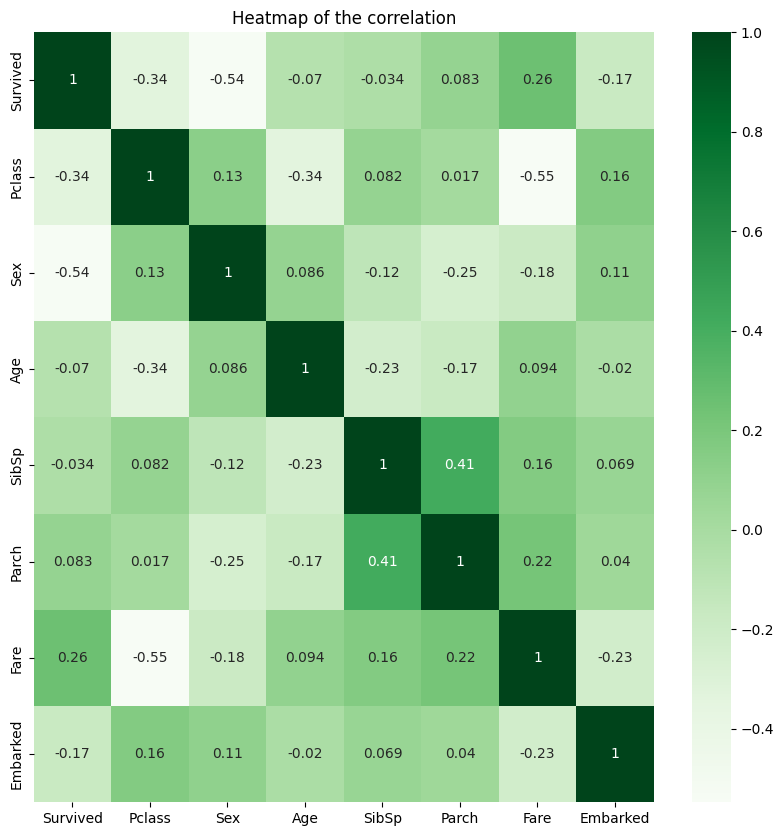

In [334]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,cmap="Greens")
plt.title("Heatmap of the correlation")

Pairplot

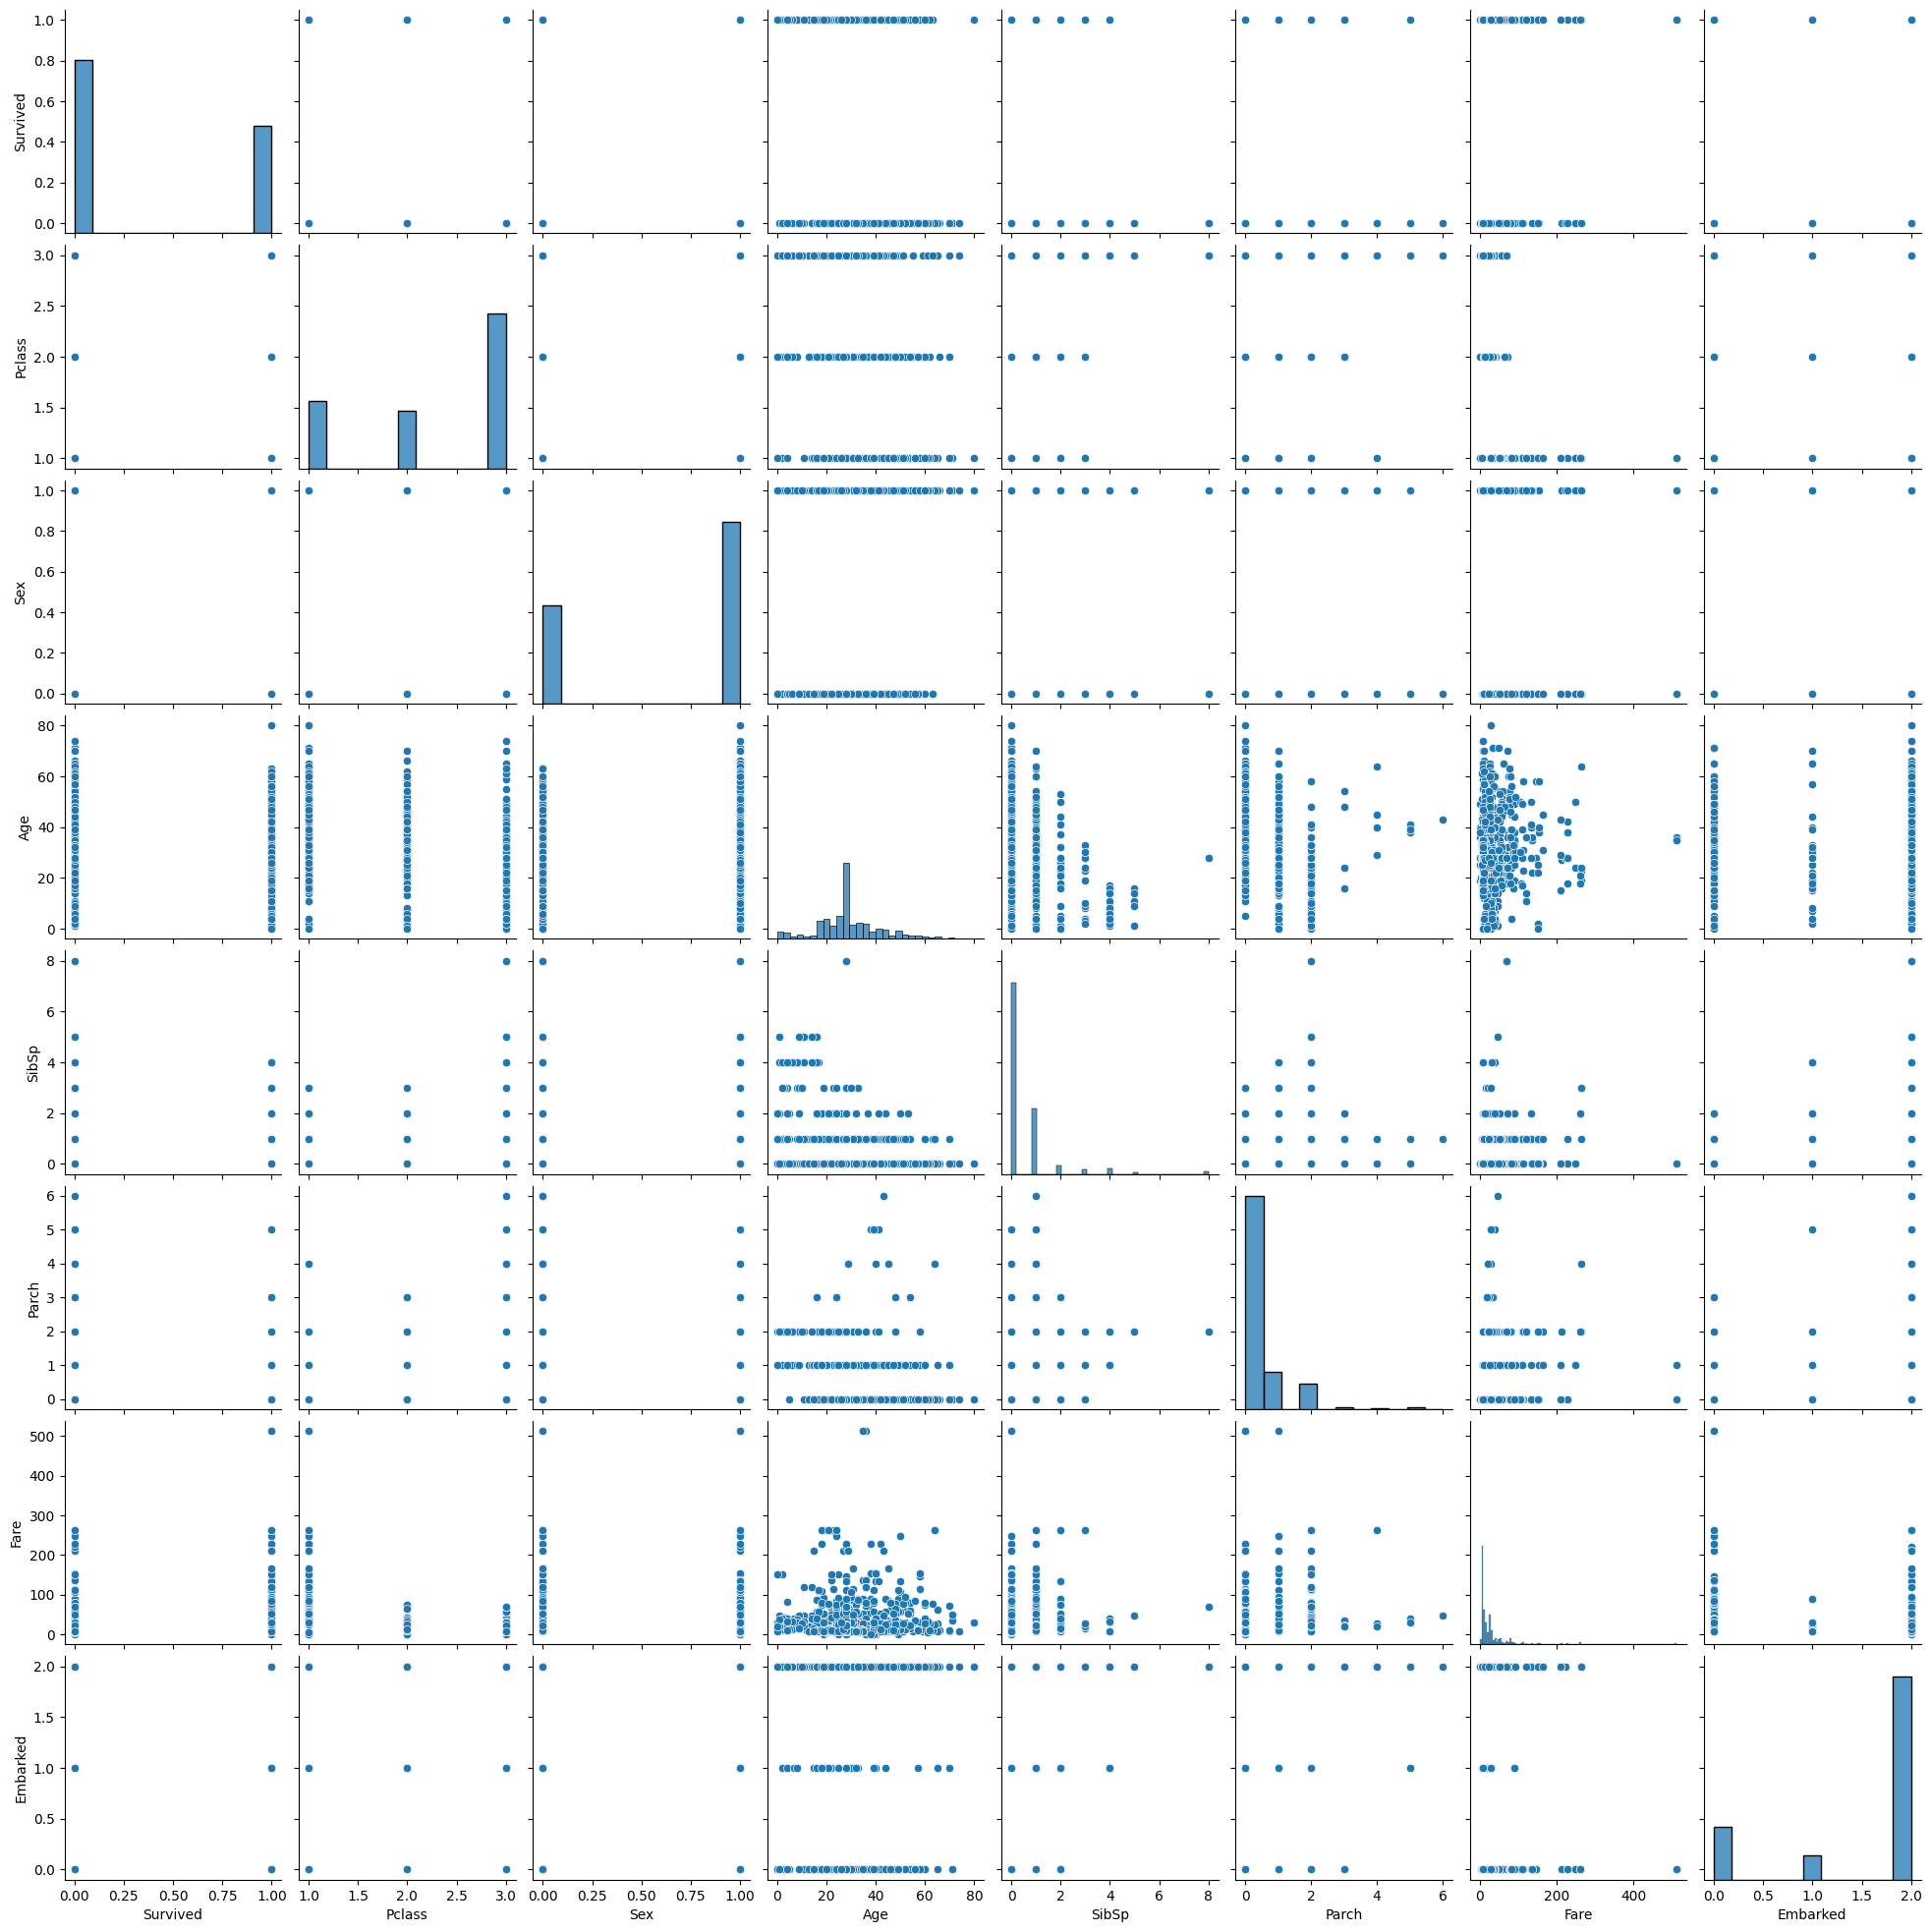

In [335]:
sns.pairplot(data)

# Feature Importance / Feature Selection

In [336]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.2500,2
1,1,1,0,38,1,0,71.2833,0
2,1,3,0,26,0,0,7.9250,2
3,1,1,0,35,1,0,53.1000,2
4,0,3,1,35,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27,0,0,13.0000,2
887,1,1,0,19,0,0,30.0000,2
888,0,3,0,28,1,2,23.4500,2
889,1,1,1,26,0,0,30.0000,0


In [337]:
x = data.iloc[:,1:]
y = data.iloc[:,0]

In [340]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22,1,0,7.2500,2
1,1,0,38,1,0,71.2833,0
2,3,0,26,0,0,7.9250,2
3,1,0,35,1,0,53.1000,2
4,3,1,35,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27,0,0,13.0000,2
887,1,0,19,0,0,30.0000,2
888,3,0,28,1,2,23.4500,2
889,1,1,26,0,0,30.0000,0


In [341]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [342]:
from sklearn.ensemble import ExtraTreesClassifier

In [343]:
feat = ExtraTreesClassifier()

In [344]:
feat.fit(x,y)

ExtraTreesClassifier()

In [345]:
feat.feature_importances_

array([0.10345671, 0.28965656, 0.24297018, 0.04508955, 0.04502298,
       0.24187564, 0.03192838])

<Axes: >

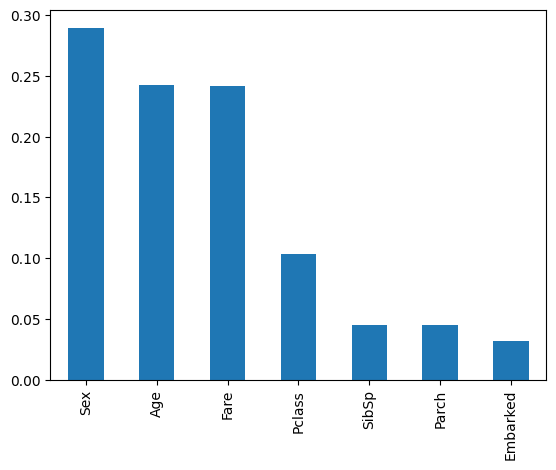

In [350]:
feat_imp = pd.Series(feat.feature_importances_,x.columns)
feat_imp.nlargest(8).plot(kind='bar')

# Machine Learining
    Using the Classification

Splitting the data using Kfold

In [358]:
sk = StratifiedKFold(n_splits=5)

In [359]:
for train_index, test_index in sk.split(x,y):
    x_train, x_test = x.iloc[train_index],x.iloc[test_index]
    y_train, y_test = y.iloc[train_index],y.iloc[test_index]
    

In [370]:
len(x_train),len(x_test), len(y_train), len(y_test)

(712, 177, 712, 177)

# Model Selection

In [371]:
model = LogisticRegression()

# train the model

In [372]:
model.fit(x_train,y_train)

LogisticRegression()

# Test the model

In [385]:
y_train_pred = model.predict(x_train)

In [386]:
final = pd.DataFrame({"Actual":y_train,"predict":y_train_pred})

In [387]:
final

,Actual,predict
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
714,0,0
715,0,0
718,0,0
719,0,0


# EDA

In [388]:
final.head()

,Actual,predict
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0


heatmap

<Axes: >

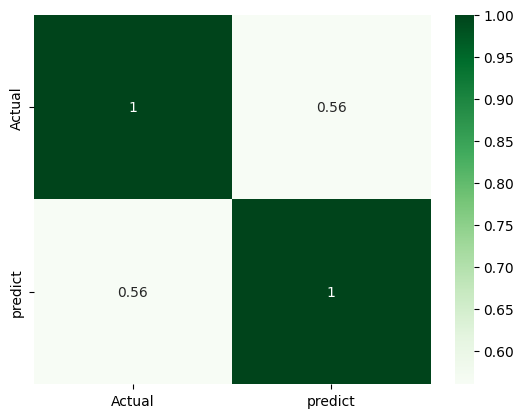

In [389]:
sns.heatmap(final.corr(),annot=True,cmap="Greens")

# Performance Metric - Confusion Matrix

In [393]:
confusion_matrix(y_train,y_train_pred)

array([[378,  62],
       [ 84, 188]], dtype=int64)

to find accuracy

In [394]:
from sklearn.metrics import accuracy_score

In [395]:
accuracy_score(y_train,y_train_pred)

0.7949438202247191

In [396]:
from sklearn.metrics import classification_report

In [397]:
classification_report(y_train, y_train_pred)

'              precision    recall  f1-score   support\n\n           0       0.82      0.86      0.84       440\n           1       0.75      0.69      0.72       272\n\n    accuracy                           0.79       712\n   macro avg       0.79      0.78      0.78       712\nweighted avg       0.79      0.79      0.79       712\n'

# Conclusion : 
The accuracy is 79% 